In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.optim import RMSprop, SGD
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import DatasetFolder, ImageFolder, ImageNet, mnist, MNIST
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

C:\python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.7) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [4]:
X_train = MNIST(root='C:/Users/mehmet/Jupyter Notebook/Pytorch/', download=False, train=True)

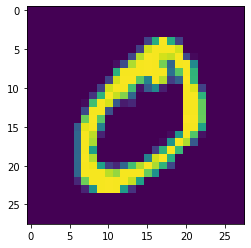

In [5]:
plt.imshow(X_train.data[1])

In [6]:
X_train.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

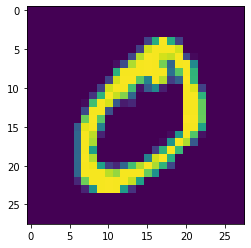

In [7]:
plt.imshow(X_train.train_data[1])

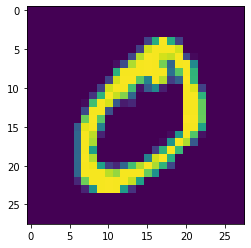

In [8]:
plt.imshow(X_train.test_data[1])

In [9]:
type(X_train.train_data)

torch.Tensor

In [10]:
type(X_train.test_data)

torch.Tensor

In [11]:
type(X_train.train_labels)

torch.Tensor

In [12]:
type(X_train.test_labels)

torch.Tensor

In [13]:
train_tensor = TensorDataset(X_train.train_data, X_train.train_labels)
test_tensor = TensorDataset(X_train.test_data, X_train.test_labels)
type(train_tensor)

torch.utils.data.dataset.TensorDataset

In [14]:
len(train_tensor), len(test_tensor)

(60000, 60000)

In [15]:
batch_size = 100
train_loader = DataLoader(train_tensor, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_tensor, batch_size=batch_size, shuffle=False)
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [23]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        x = self.linear(x)
        return x

In [24]:
input_dim = 28*28
output_dim = 10
model = LogisticRegression(input_dim, output_dim)

lr = 1e-3
entropy = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=lr)

In [25]:
count = 0
loss_list = []
iteration_list = []

In [40]:
num_epoch = 30

for epoch in range(num_epoch):
    for images, labels in train_loader:
        train = Variable(images.view(-1, 28*28).float())
        optimizer.zero_grad()
        outputs = model(train)
        loss = entropy(outputs, labels.long())
        loss.backward()
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28).float())
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            loss_list.append(loss.data)
            iteration_list.append(count)
            
        if count % 500 == 0:
            print(f'Iteration: {count} / Loss Data: {loss.data} / \
Accuracy: {accuracy}')

Iteration: 5500 / Loss Data: 15.782234191894531 / Accuracy: 88.81666564941406
Iteration: 6000 / Loss Data: 5.20335578918457 / Accuracy: 90.1050033569336
Iteration: 6500 / Loss Data: 15.154175758361816 / Accuracy: 88.74166870117188
Iteration: 7000 / Loss Data: 10.196858406066895 / Accuracy: 90.37000274658203
Iteration: 7500 / Loss Data: 8.213878631591797 / Accuracy: 90.62000274658203
Iteration: 8000 / Loss Data: 23.4305477142334 / Accuracy: 87.8116683959961
Iteration: 8500 / Loss Data: 3.213942527770996 / Accuracy: 91.63833618164062
Iteration: 9000 / Loss Data: 7.15557861328125 / Accuracy: 90.71499633789062
Iteration: 9500 / Loss Data: 3.0582239627838135 / Accuracy: 90.97666931152344
Iteration: 10000 / Loss Data: 5.785083770751953 / Accuracy: 91.56666564941406
Iteration: 10500 / Loss Data: 13.599648475646973 / Accuracy: 86.5183334350586
Iteration: 11000 / Loss Data: 14.560437202453613 / Accuracy: 87.68499755859375
Iteration: 11500 / Loss Data: 13.195337295532227 / Accuracy: 88.650001525